In [1]:
pip install pycountry_convert

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 61.0 MB/s eta 0:00:00:00:010:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry_convert as pc


pd.set_option('display.max_columns', None)

# 0. Objectives

* Do the data preprocessing before narrowing on the data that is going to be used for visualization

EDA:
1. Continent's overall life expectancy (increasing or decreasing)
2. Life expectancy at all ages
3. Does the followig assumption still holds "Women tend to live longer than men, but his gap has changed over time"
4. 

# 1. Problem Definition


* What does my company do?
My company is a non-profit organization focused on improving the social and economical aspects of african youth.

* What does your company trying to do using this data?
We wants to study the life expectancy in African countries to observe trends and pattrens that can help us to improve their quality of life based on the problems and struggles we deduce from analyzing the data.

* What is the purpose of using the data? What do you hope to acomplish?
*"If this were a real company, what decision would this data help with?"*

This data would help me with figuring out what country needs more attention than others.

---

A non-profit organization aims to increase life expectancy within African counties. Explore the causes behind why life expectany is lower in some countries than others.

There's no metric for this project. It's not intented to use machine leanring in this project.

# 1. Problem Definition (Improved by ChatGPT)

One of the key indicators of a population’s overall health and development is **life expectancy** — a measure that reflects not only access to healthcare, but also the quality of education, nutrition, public safety, and infrastructure.

We aim to use the **"Global Life Expectancy"** dataset from *Our World in Data* to conduct a focused analysis on **life expectancy trends across African countries**. The dataset includes life expectancy figures across different years, age groups, and genders, enabling a multidimensional understanding of longevity in the region.

By identifying patterns and anomalies in life expectancy data, we hope to answer questions such as:

* Which African countries have experienced the most or least improvement in life expectancy over time?
* Are there significant disparities in life expectancy between age groups?
* What external factors might correlate with lower life expectancy in certain regions?

The ultimate goal of this analysis is to **prioritize intervention**. The insights will help us identify **which countries or demographics require urgent attention**, and guide our efforts toward **evidence-based policies and programs** aimed at improving youth outcomes, reducing mortality, and promoting long-term development.

# 2. Data Collection

In [3]:
def country_to_continent(country_name):
    try:
        country_alpha2 = pc.country_name_to_country_alpha2(country_name)
        country_continent_name = pc.country_alpha2_to_continent_code(country_alpha2)
        return country_continent_name
    except KeyError:
        return np.nan

## Life Expectancy 

In [4]:
original_life_expectancy_df = pd.read_csv("/kaggle/input/life-expectancy-prediction-dataset/life_expectancy.csv")
original_life_expectancy_df.head()

,Entity,Code,Year,LifeExpectancy
0,Afghanistan,AFG,1950,27.7275
1,Afghanistan,AFG,1951,27.9634
2,Afghanistan,AFG,1952,28.4456
3,Afghanistan,AFG,1953,28.9304
4,Afghanistan,AFG,1954,29.2258


In [5]:
original_life_expectancy_df.isna().sum()

Entity               0
Code              1694
Year                 0
LifeExpectancy       0
dtype: int64

In [6]:
original_life_expectancy_df[original_life_expectancy_df['Code'].isna()]['Entity'].nunique()

23

# 3.1 Data Preprocessing

## Narrowing the scope on African countries

In [7]:
original_life_expectancy_df['Continent'] = original_life_expectancy_df.apply(lambda x: country_to_continent(x['Entity']), axis=1)

In [8]:
# All the values failed to be converted to continent code
failed_conversions = original_life_expectancy_df.loc[original_life_expectancy_df['Continent'].isna(), 'Entity']
failed_conversions.value_counts()

Entity
England and Wales                                              109
Scotland                                                        95
World                                                           79
Europe                                                          79
Americas                                                        78
Asia                                                            76
Oceania                                                         75
Africa                                                          74
East Timor                                                      72
Democratic Republic of Congo                                    72
Western Sahara                                                  72
Upper-middle-income countries                                   72
Small Island Developing States (SIDS)                           72
Sint Maarten (Dutch part)                                       72
Bonaire Sint Eustatius and Saba                        

Observing the output, we notice that some countries do fail to convert such as *England and Wales* and *Scotland*.

Additionaly, there are records for the continents as a whole on there own. 

Moreover, *Our World in Data* divided the world into different groups according to county's development (e.g. *Less developed countries*, *Land-locked Developing Countries*) and income levels (e.g. *High-income countries*).

In [9]:
# Converting `Cote d'Ivoire` manualy
original_life_expectancy_df.loc[original_life_expectancy_df['Entity'] == "Cote d'Ivoire", 'Continent'] = 'AF'

In [10]:
african_countries = original_life_expectancy_df[original_life_expectancy_df['Continent'] == 'AF']
african_countries.head()

,Entity,Code,Year,LifeExpectancy,Continent
218,Algeria,DZA,1950,42.3596,AF
219,Algeria,DZA,1951,42.4534,AF
220,Algeria,DZA,1952,42.8974,AF
221,Algeria,DZA,1953,42.9286,AF
222,Algeria,DZA,1954,40.2048,AF


In [11]:
african_countries['Entity'].nunique()

54

The dataset contains all 54  African coountries

In [12]:
african_continent = original_life_expectancy_df[original_life_expectancy_df['Entity'] == 'Africa']
african_continent.head()

,Entity,Code,Year,LifeExpectancy,Continent
72,Africa,NaN,1950,37.6235,NaN
73,Africa,NaN,1951,37.9309,NaN
74,Africa,NaN,1952,38.4430,NaN
75,Africa,NaN,1953,38.9152,NaN
76,Africa,NaN,1954,39.2991,NaN


In [13]:
african_continent = african_continent.sort_values(by='Year').reset_index()
african_continent.head()

,index,Entity,Code,Year,LifeExpectancy,Continent
0,144,Africa,NaN,1770,26.4000,NaN
1,145,Africa,NaN,1925,26.4000,NaN
2,72,Africa,NaN,1950,37.6235,NaN
3,73,Africa,NaN,1951,37.9309,NaN
4,74,Africa,NaN,1952,38.4430,NaN


In [14]:
african_continent['Year'].describe()

count      74.000000
mean     1981.770270
std        33.139203
min      1770.000000
25%      1966.250000
50%      1984.500000
75%      2002.750000
max      2021.000000
Name: Year, dtype: float64

I'll remove the first two datapoints since they are disconnect from the rest of the data

In [15]:
african_continent = african_continent.drop([0, 1]).reset_index()

In [16]:
world_records = original_life_expectancy_df[original_life_expectancy_df['Entity'] == 'World'].sort_values(by='Year').reset_index()
world_records.head()

,index,Entity,Code,Year,LifeExpectancy,Continent
0,20532,World,OWID_WRL,1770,28.5,NaN
1,20533,World,OWID_WRL,1800,28.5,NaN
2,20534,World,OWID_WRL,1820,29.0,NaN
3,20535,World,OWID_WRL,1850,29.3,NaN
4,20536,World,OWID_WRL,1870,29.7,NaN


# 4.1 EDA

## 1. Continent's overall life expectancy

Improvements:
1. ~~Horizontal grid lines only~~
2. Faded x-axis line (the one above the ticks)
3. ~~No y-axis line~~
4. ~~No ticks on both axes~~
5. ~~Change x-axis range~~
6. ~~axes label~~
7. Add the average of the world for reference

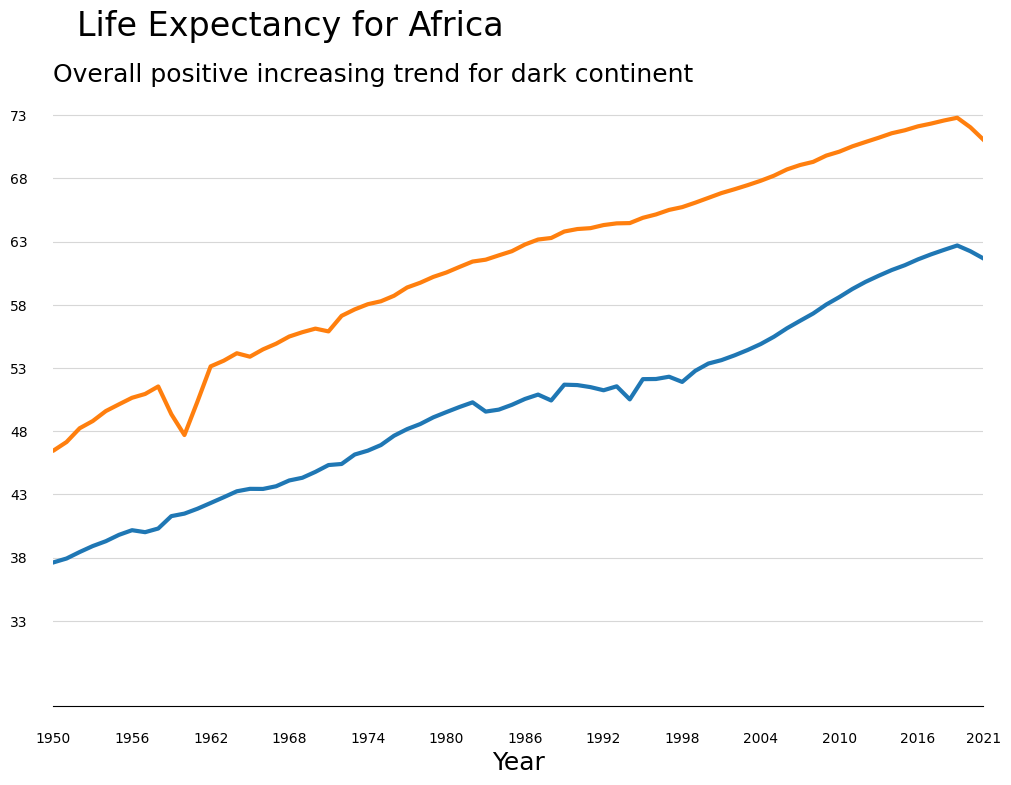

In [17]:
plt.rcParams['axes.spines.left'] = False
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.bottom'] = True

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot('Year', 'LifeExpectancy', data=african_continent, linewidth=3)
ax.plot('Year', 'LifeExpectancy', data=world_records, linewidth=3)

ax.grid(True, axis='y', alpha=0.5)

# To remove the hyphens on the axes
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=True,
    pad=15,
)

fig.suptitle('Life Expectancy for Africa', fontsize=24, fontfamily="Calibri", horizontalalignment='right')
ax.set_title('Overall positive increasing trend for dark continent', fontsize=18, fontfamily="Calibri", loc='left')
ax.set_xlabel('Year', fontsize=18, fontfamily="Calibri",)

xticks = np.arange(african_continent['Year'].min(), african_continent['Year'].max(), step=6)
ax.set_xticks(np.append(xticks, 2021))

african_min_life_expectancy = np.round(african_continent['LifeExpectancy'].min() - 5)
world_max_life_expectancy = np.round(world_records['LifeExpectancy'].max() + 5)
ax.set_yticks(np.arange(african_min_life_expectancy, world_max_life_expectancy, 5))

ax.set_xlim(african_continent['Year'].min(),  african_continent['Year'].max())

plt.show()

## 2. Highest/Lowest Life Expectancy

Improvements:
1. Each group should have similar colors to separate among them
2. Remove ticks
3. Add title, subtitle, axes labels
4. Change the xaxis range to [1950, 2021]
5. Horizontal faded grid lines

In [18]:
last_recorded_year = african_countries['Year'].max()
last_year_expectancy = african_countries.loc[african_countries['Year'] == last_recorded_year]
last_year_expectancy = last_year_expectancy.sort_values(by='LifeExpectancy', ascending=False)

In [19]:
last_year_expectancy.head(10)

,Entity,Code,Year,LifeExpectancy,Continent
289,Algeria,DZA,2021,76.3767,AF
11853,Mayotte,MYT,2021,74.2286,AF
3196,Cape Verde,CPV,2021,74.0518,AF
12620,Morocco,MAR,2021,74.0419,AF
18910,Tunisia,TUN,2021,73.7719,AF
11776,Mauritius,MUS,2021,73.5552,AF
10573,Libya,LBY,2021,71.9112,AF
16621,Seychelles,SYC,2021,71.2945,AF
5099,Egypt,EGY,2021,70.2207,AF
16235,Sao Tome and Principe,STP,2021,67.5912,AF


In [20]:
highest_countries_last_year = last_year_expectancy['Entity'].head(5)
lowest_countries_last_year = last_year_expectancy['Entity'].tail(5)

In [21]:
highest_life_expectancy_countries = african_countries[african_countries['Entity'].isin(highest_countries_last_year)]
lowest_life_expectancy_countries = african_countries[african_countries['Entity'].isin(lowest_countries_last_year)]

In [22]:
highest_life_expectancy_countries

,Entity,Code,Year,LifeExpectancy,Continent
218,Algeria,DZA,1950,42.3596,AF
219,Algeria,DZA,1951,42.4534,AF
220,Algeria,DZA,1952,42.8974,AF
221,Algeria,DZA,1953,42.9286,AF
222,Algeria,DZA,1954,40.2048,AF
...,...,...,...,...,...
18909,Tunisia,TUN,2020,75.2923,AF
18910,Tunisia,TUN,2021,73.7719,AF
18911,Tunisia,TUN,1923,28.8000,AF
18912,Tunisia,TUN,1933,31.2200,AF


In [23]:
highest_life_expectancy_countries = highest_life_expectancy_countries[highest_life_expectancy_countries['Year'] > 1950].sort_values(by='Year')
lowest_life_expectancy_countries = lowest_life_expectancy_countries[lowest_life_expectancy_countries['Year'] > 1950].sort_values(by='Year')

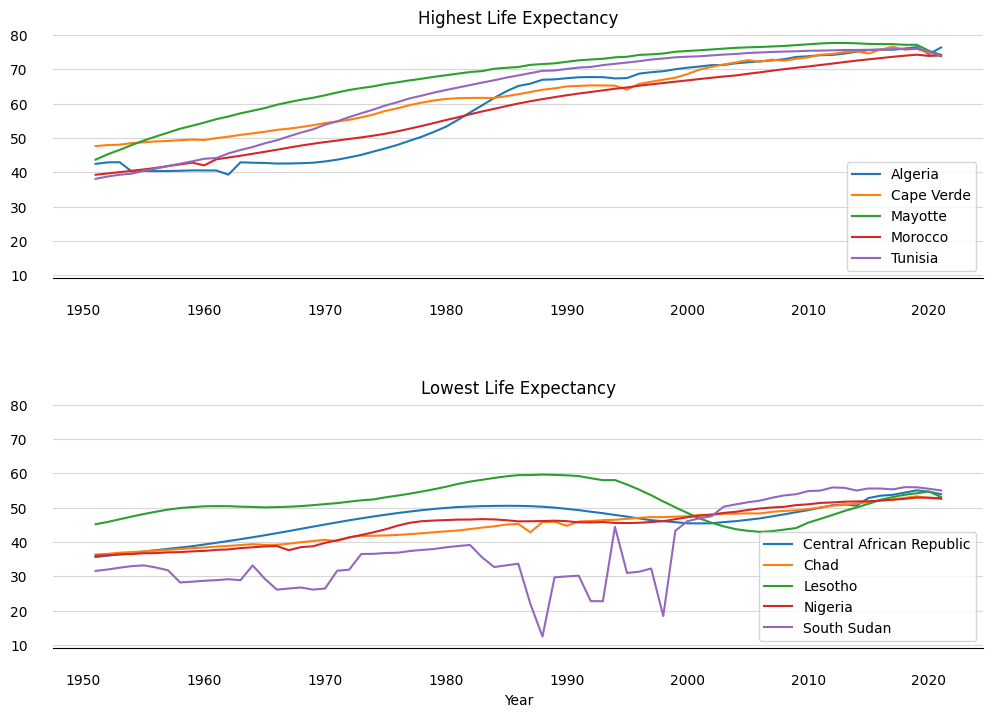

In [24]:
fig, axes = plt.subplots(nrows=2, figsize=(12, 8), sharex=True, sharey=True, gridspec_kw={'hspace': 0.5})

axes[0].set_title('Highest Life Expectancy')
grouped = highest_life_expectancy_countries.groupby('Entity')
for key, group in grouped:
    group.plot(ax=axes[0], kind='line', x='Year', y='LifeExpectancy', label=key)


axes[1].set_title('Lowest Life Expectancy')
grouped = lowest_life_expectancy_countries.groupby('Entity')
for key, group in grouped:
    group.plot(ax=axes[1], kind='line', x='Year', y='LifeExpectancy', label=key)


for ax in axes.flat:
    ax.grid(True, axis='y', alpha=0.5)

    # To remove the hyphens on the axes
    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=True,
        pad=15,
    )
    

plt.show()

## 3. Rate of increase for africa compared to the rest of the world

In [25]:
def year_over_year_growth(previous, current):
    yoy_growth = ((current / previous) - 1) * 100
    return round(yoy_growth, 2)

In [26]:
def yoy_per_entity(series):
    yoy_values = []

    for index in range(1, len(series)):
        yoy = year_over_year_growth(series.iloc[index-1], series.iloc[index])
        yoy_values.append(yoy)

    return pd.Series(yoy_values)

In [27]:
african_continent.shape[0], world_records.shape[0]

(72, 79)

Since there are more reocrds for the world's life expecanty than there are for Africa. We need to reduce the world records to match Africa's

In [28]:
reduced_world_records =  world_records[world_records['Year'] >= 1950].reset_index()

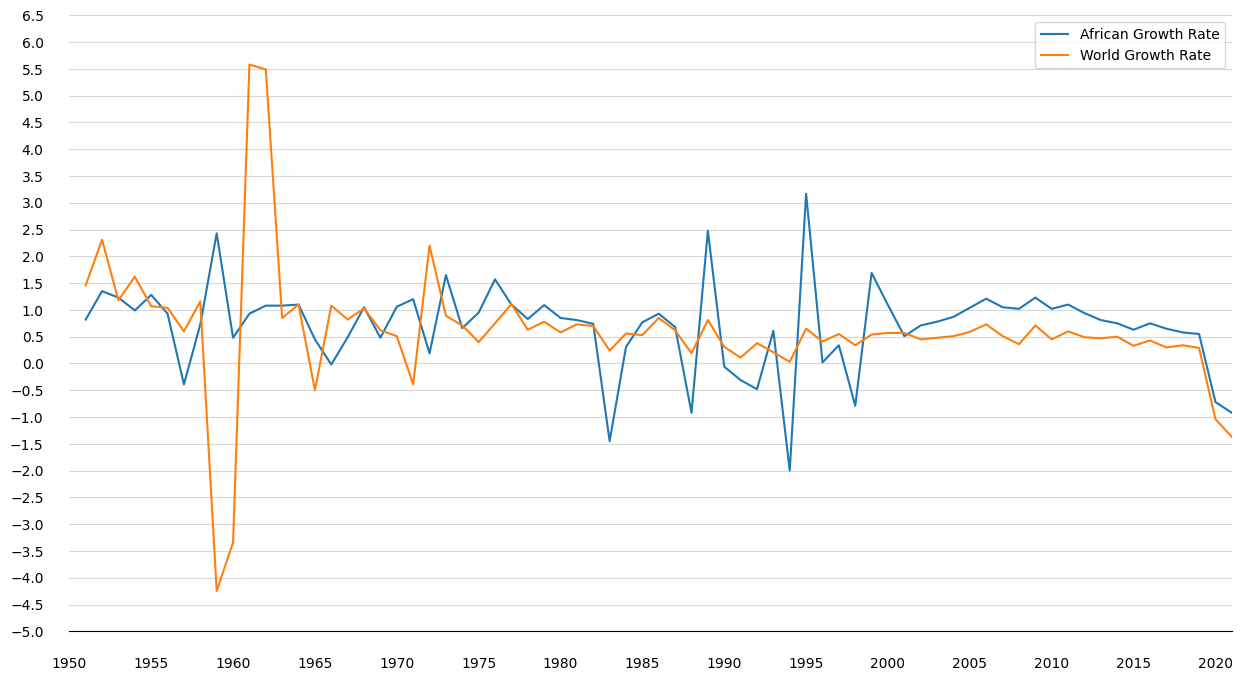

In [29]:
fig, ax = plt.subplots(figsize=(15, 8))

african_yoy = yoy_per_entity(african_continent['LifeExpectancy'])
world_yoy = yoy_per_entity(reduced_world_records['LifeExpectancy'])

ax.plot(african_continent.loc[1:, 'Year'], african_yoy, label='African Growth Rate')
ax.plot(reduced_world_records.loc[1:, 'Year'], world_yoy, label='World Growth Rate')

ax.grid(True, axis='y', alpha=0.5)

ax.set_xlim(african_continent['Year'].min(),  african_continent['Year'].max())

max_value = max(african_yoy.max(), world_yoy.max())
min_value = min(african_yoy.min(), world_yoy.min())
ax.set_ylim(min_value,  max_value)

ax.set_xticks(np.arange(african_continent['Year'].min(), african_continent['Year'].max(), 5))
ax.set_yticks(np.arange(round(min_value-1), round(max_value+1), 0.5))

# To remove the hyphens on the axes
ax.tick_params(
    axis='both',
    which='both',
    bottom=False,
    left=False,
    labelbottom=True,
    pad=15,
)

ax.legend()

plt.show()

## 4. Top improving/declining countries

I will take the top countries based on the average of their year-over-year growth of the last 10 years.

Improvements:
1. ~~Divide the countries into 2 figures and add label and legend for each~~
3. ~~Recreate the plot and have them each in a separate plot, sharing the x axis.~~
    * Make sure the yaxis range is consistent among all of them so the changes are easy to compare

In [30]:
african_countries_names = african_countries['Entity'].unique()

In [31]:
yoy_rate = {}
yoy_averages = {}
for country in african_countries_names:
    # 1. select country's records
    country_records = original_life_expectancy_df[original_life_expectancy_df['Entity'] == country]

    # 2. sort by year
    country_records = country_records.sort_values(by='Year').reset_index()

    
    # 3. calculate yoy
    country_yoy = yoy_per_entity(country_records['LifeExpectancy'])

    
    # 4. pick last 10 years and calculate average
    average = np.mean(country_yoy[-10:])

    # 5. save into dictionary
    yoy_rate[country] = [country_records['Year'], country_yoy]
    yoy_averages[country] = average

In [32]:
yoy_averages_df = pd.DataFrame(list(yoy_averages.items()), columns=['Entity', 'Average'])
yoy_averages_df.head()

,Entity,Average
0,Algeria,0.308
1,Angola,0.683
2,Benin,0.231
3,Botswana,0.138
4,Burkina Faso,0.372


In [33]:
yoy_averages_df = yoy_averages_df.sort_values(by='Average', ascending=False)
yoy_averages_df.head()

,Entity,Average
17,Eswatini,1.734
25,Lesotho,1.300
53,Zimbabwe,1.075
43,Sierra Leone,0.957
29,Malawi,0.915


In [34]:
# Entity, Year, YoY: list[float]
yoy_rate_df = pd.DataFrame(list(yoy_rate.items()), columns=['Entity', 'YoY'])
yoy_rate_df.head()

,Entity,YoY
0,Algeria,"[[1923, 1933, 1943, 1950, 1951, 1952, 1953, 19..."
1,Angola,"[[1940, 1950, 1951, 1952, 1953, 1954, 1955, 19..."
2,Benin,"[[1950, 1951, 1952, 1953, 1954, 1955, 1956, 19..."
3,Botswana,"[[1950, 1951, 1952, 1953, 1954, 1955, 1956, 19..."
4,Burkina Faso,"[[1950, 1951, 1952, 1953, 1954, 1955, 1956, 19..."


In [35]:
# Sorting yoy_rate_df with the index from `yoy_averages_df` after sorting it based on the averages
yoy_rate_df = yoy_rate_df.iloc[yoy_averages_df.index]

In [36]:
selected_countries = pd.concat([yoy_rate_df.head(), yoy_rate_df.tail()]).reset_index()
selected_countries

,index,Entity,YoY
0,17,Eswatini,"[[1950, 1951, 1952, 1953, 1954, 1955, 1956, 19..."
1,25,Lesotho,"[[1950, 1951, 1952, 1953, 1954, 1955, 1956, 19..."
2,53,Zimbabwe,"[[1950, 1951, 1952, 1953, 1954, 1955, 1956, 19..."
3,43,Sierra Leone,"[[1931, 1950, 1951, 1952, 1953, 1954, 1955, 19..."
4,29,Malawi,"[[1950, 1951, 1952, 1953, 1954, 1955, 1956, 19..."
5,7,Cape Verde,"[[1950, 1951, 1952, 1953, 1954, 1955, 1956, 19..."
6,32,Mauritius,"[[1924, 1934, 1941, 1944, 1947, 1950, 1951, 19..."
7,50,Tunisia,"[[1923, 1933, 1943, 1950, 1951, 1952, 1953, 19..."
8,42,Seychelles,"[[1950, 1951, 1952, 1953, 1954, 1955, 1956, 19..."
9,33,Mayotte,"[[1950, 1951, 1952, 1953, 1954, 1955, 1956, 19..."


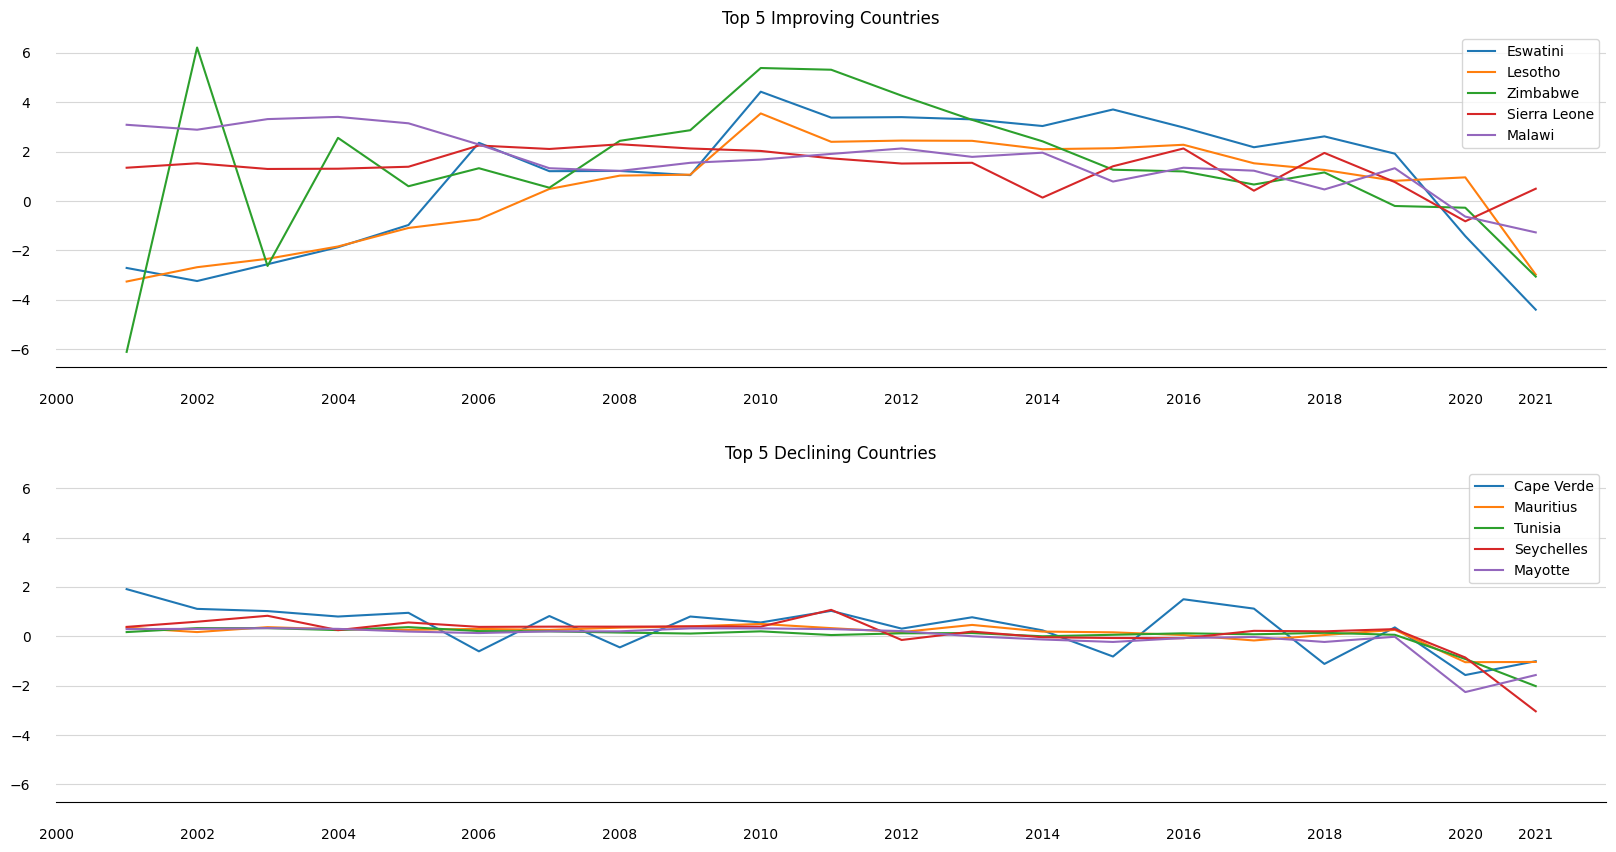

In [37]:
fig, axes = plt.subplots(nrows=2, figsize=(20, 10), sharey=True, gridspec_kw={'hspace': 0.3})
starting_year = 2000

axes[0].set_title('Top 5 Improving Countries')
for index, row in yoy_rate_df.head().iterrows():
    years_array = row['YoY'][0]
    yoy_array = row['YoY'][1]
    # find the index of year 1960. Then, use this index to slice the array
    starting_year_index = (years_array == starting_year).argmax()
    axes[0].plot(years_array[starting_year_index+1:], yoy_array[starting_year_index:], label=row['Entity'])

axes[1].set_title('Top 5 Declining Countries')
for index, row in yoy_rate_df.tail().iterrows():
    years_array = row['YoY'][0]
    yoy_array = row['YoY'][1]
    # find the index of year 1960. Then, use this index to slice the array
    starting_year_index = (years_array == starting_year).argmax()
    axes[1].plot(years_array[starting_year_index+1:], yoy_array[starting_year_index:], label=row['Entity'])


# Shared Properties
for ax in axes.flat:
    ax.grid(True, axis='y', alpha=0.5)

    xticks = np.arange(starting_year, 2021, 2)
    ax.set_xticks(np.append(xticks, 2021))

    # To remove the hyphens on the axes
    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=True,
        pad=15,
    )
    
    ax.legend()

plt.show()

# 3.2 Data Preprocessing

In [38]:
life_expectancy_by_age = pd.read_csv('/kaggle/input/life-expectancy-prediction-dataset/life_expectancy_different_ages.csv')
life_expectancy_by_age.head()

,Entity,Code,Year,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80
0,Afghanistan,AFG,1950,27.7275,49.1459,54.442200,63.422500,73.4901,83.7259
1,Afghanistan,AFG,1951,27.9634,49.2941,54.564400,63.500603,73.5289,83.7448
2,Afghanistan,AFG,1952,28.4456,49.5822,54.799800,63.647600,73.6018,83.7796
3,Afghanistan,AFG,1953,28.9304,49.8634,55.028603,63.788902,73.6706,83.8118
4,Afghanistan,AFG,1954,29.2258,49.9306,55.116500,63.848100,73.7041,83.8334


## Narrowing the scope on African countries

In [39]:
life_expectancy_by_age['Continent'] = life_expectancy_by_age.apply(lambda x: country_to_continent(x['Entity']), axis=1)

In [40]:
# All the values failed to be converted to continent code
failed_conversions = life_expectancy_by_age.loc[life_expectancy_by_age['Continent'].isna(), 'Entity']
failed_conversions.value_counts()

Entity
England and Wales                                              109
Scotland                                                        95
World                                                           79
Europe                                                          79
Americas                                                        78
Asia                                                            76
Oceania                                                         75
Africa                                                          74
East Timor                                                      72
Democratic Republic of Congo                                    72
Western Sahara                                                  72
Upper-middle-income countries                                   72
Small Island Developing States (SIDS)                           72
Sint Maarten (Dutch part)                                       72
Bonaire Sint Eustatius and Saba                        

In [41]:
# Converting `Cote d'Ivoire` manualy
life_expectancy_by_age.loc[life_expectancy_by_age['Entity'] == "Cote d'Ivoire", 'Continent'] = 'AF'

In [42]:
life_expectancy_by_age.head()

,Entity,Code,Year,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80,Continent
0,Afghanistan,AFG,1950,27.7275,49.1459,54.442200,63.422500,73.4901,83.7259,AS
1,Afghanistan,AFG,1951,27.9634,49.2941,54.564400,63.500603,73.5289,83.7448,AS
2,Afghanistan,AFG,1952,28.4456,49.5822,54.799800,63.647600,73.6018,83.7796,AS
3,Afghanistan,AFG,1953,28.9304,49.8634,55.028603,63.788902,73.6706,83.8118,AS
4,Afghanistan,AFG,1954,29.2258,49.9306,55.116500,63.848100,73.7041,83.8334,AS


# 4.2 EDA

## 1. What is the age group most in danger?

Similar to the one in the `OurWorldinData` but each age group is in their own chart with comparison with the world data

In [43]:
is_african = life_expectancy_by_age['Entity'] == 'Africa'
newer_than_1950 = life_expectancy_by_age['Year'] >= 1950
african_continent = life_expectancy_by_age[is_african & newer_than_1950].sort_values(by='Year')
african_continent.head()

,Entity,Code,Year,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80,Continent
72,Africa,NaN,1950,37.6235,57.5185,61.6845,68.108300,75.6576,84.7008,NaN
73,Africa,NaN,1951,37.9309,57.6005,61.7448,68.139404,75.6747,84.7061,NaN
74,Africa,NaN,1952,38.4430,57.7748,61.8863,68.242800,75.7370,84.7385,NaN
75,Africa,NaN,1953,38.9152,58.0001,62.0627,68.357400,75.7972,84.7545,NaN
76,Africa,NaN,1954,39.2991,58.0010,62.0707,68.402800,75.8419,84.7802,NaN


In [44]:
is_world = life_expectancy_by_age['Entity'] == 'World'
newer_than_1950 = life_expectancy_by_age['Year'] >= 1950
world_records = life_expectancy_by_age[is_world & newer_than_1950].sort_values(by='Year')
world_records.head()

,Entity,Code,Year,LifeExpectancy0,LifeExpectancy10,LifeExpectancy25,LifeExpectancy45,LifeExpectancy65,LifeExpectancy80,Continent
20460,World,OWID_WRL,1950,46.4643,61.1572,64.309296,69.295800,76.2965,85.0199,NaN
20461,World,OWID_WRL,1951,47.1440,61.6418,64.674500,69.456200,76.3369,85.0145,NaN
20462,World,OWID_WRL,1952,48.2311,62.4193,65.298800,69.831696,76.5593,85.1412,NaN
20463,World,OWID_WRL,1953,48.8024,62.7906,65.600000,70.021400,76.6337,85.1490,NaN
20464,World,OWID_WRL,1954,49.5919,63.2983,66.018700,70.314700,76.8152,85.2582,NaN


In [45]:
feature_names = []

for col in african_continent.columns:
    if 'LifeExpectancy' in col:
        feature_names.append(col)

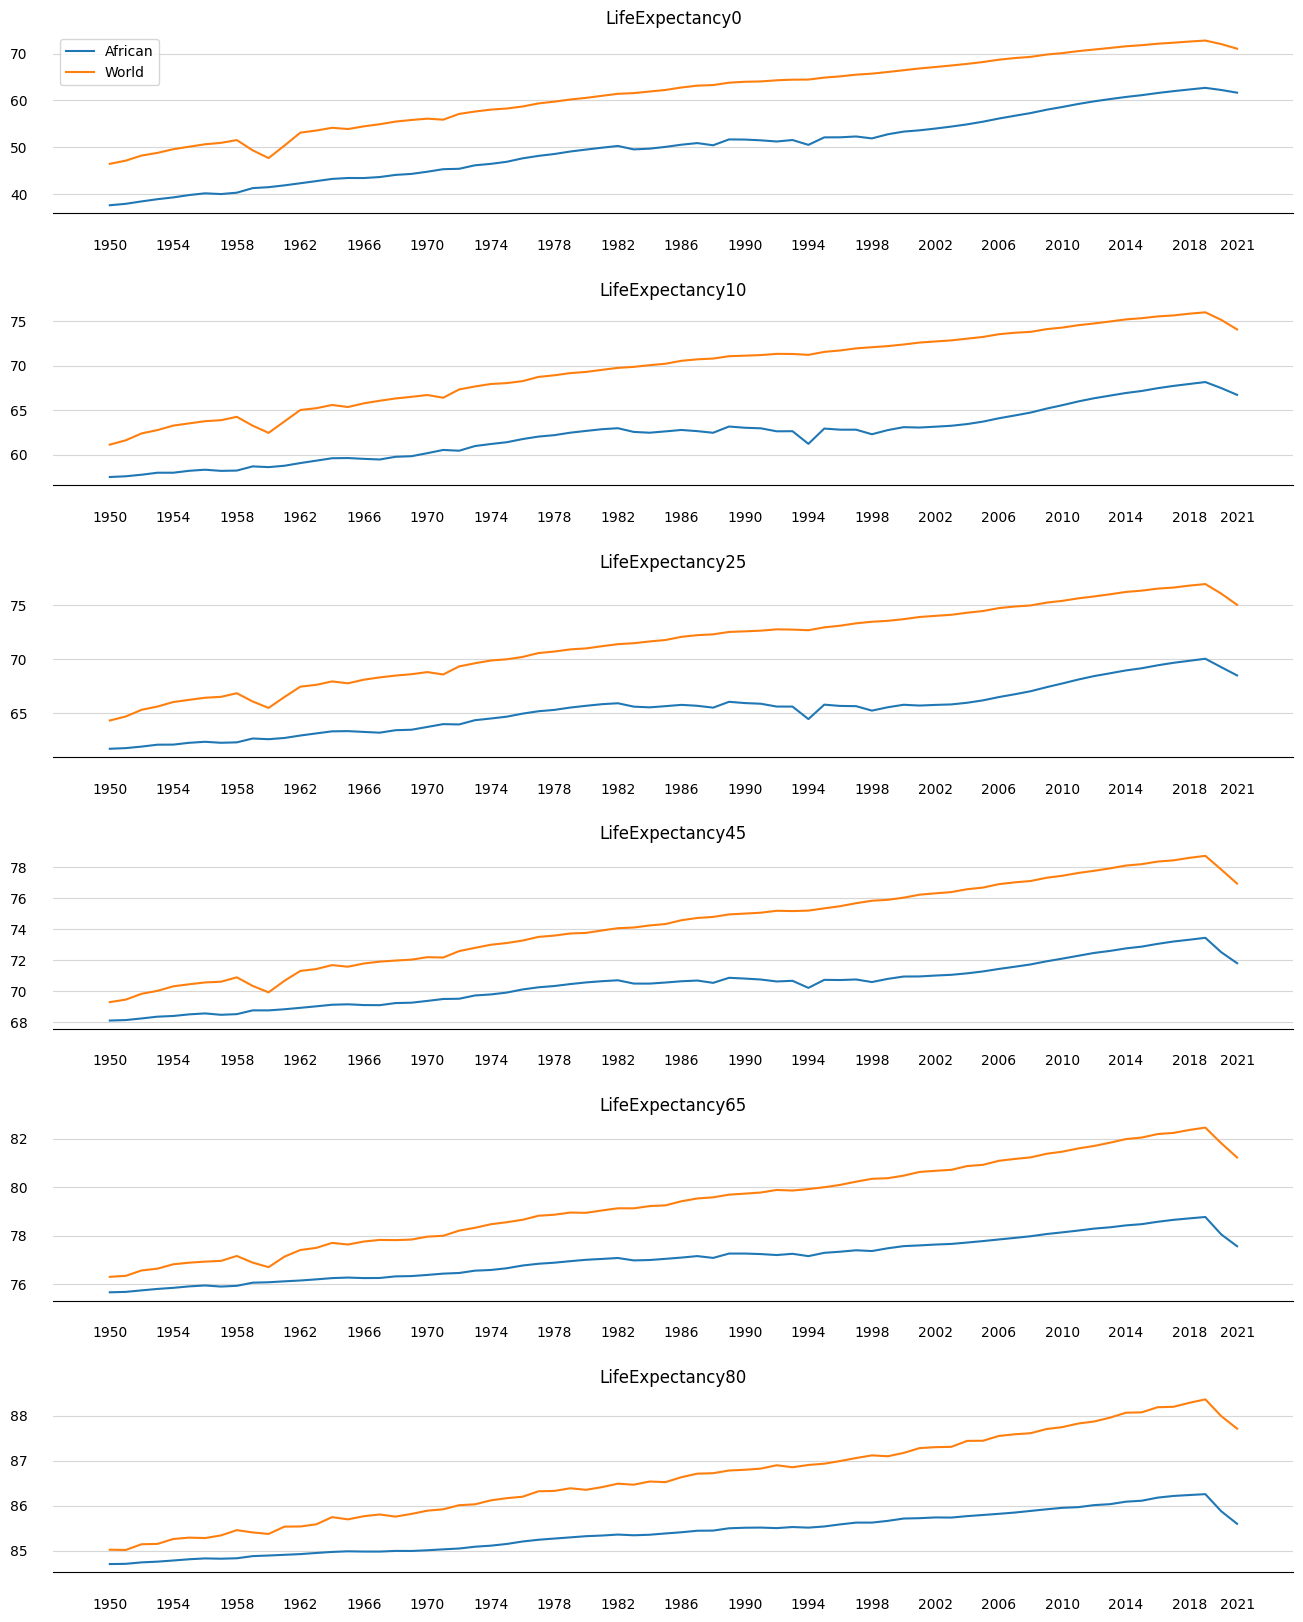

In [61]:
fig, axes = plt.subplots(nrows=6, figsize=(16, 20), gridspec_kw={'hspace': 0.5})

for index in range(len(feature_names)):
    axes[index].plot('Year', feature_names[index], data=african_continent, label='African')
    axes[index].plot('Year', feature_names[index], data=world_records, label='World')
    axes[index].set_title(feature_names[index])


for ax in axes.flat:
    if ax == axes[0]:
        ax.legend()
    ax.grid(True, axis='y', alpha=0.5)
    
    ax.tick_params(
        axis='both',
        which='both',
        bottom=False,
        left=False,
        labelbottom=True,
        pad=15,
    )

    xticks = np.arange(1950, 2020, 4)
    ax.set_xticks(np.append(xticks, 2021))

plt.show()